# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
# Import API key
weather_api_key = "5850c004e7b6ed219fe3455aaf4e74bb"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [17]:
# empty arrays to be appended
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# start print
print("Beginning Data")
print("-----------------------------")

# start counter
count = 0

for citi in cities:
    # Build query URL
    query_url = f"{url}appid={weather_api_key}&q={citi}&units={units}"
    
    # weather data
    weather_json = requests.get(query_url).json()
    
    # increase count
    count += 1

    try:
        #print city name
        name = weather_json["name"]
        print(f"Record {count} of {len(cities)}: {name}")
        
        #append arrays
        city.append(weather_json["name"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        max_temp.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        
    except:
        print("City not found.")
    
print("-----------------------------")
print("Data Complete")
print("-----------------------------")

Beginning Data
-----------------------------
Record 1 of 626: Atuona
Record 2 of 626: Barguzin
Record 3 of 626: Katsuura
Record 4 of 626: Saint Paul Harbor
Record 5 of 626: Osorno
Record 6 of 626: Hilo
Record 7 of 626: Ilulissat
Record 8 of 626: Vila do Maio
Record 9 of 626: Caravelas
Record 10 of 626: Jamestown
Record 11 of 626: Kutum
Record 12 of 626: Semey
Record 13 of 626: Ushuaia
Record 14 of 626: Vieste
Record 15 of 626: Rikitea
Record 16 of 626: Rumoi
Record 17 of 626: Port Blair
City not found.
Record 19 of 626: Concordia
Record 20 of 626: La Palma
Record 21 of 626: Lüderitz
Record 22 of 626: Hobart
Record 23 of 626: Port Alfred
Record 24 of 626: Kenai
Record 25 of 626: Narsaq
Record 26 of 626: San Jose
Record 27 of 626: Lorengau
Record 28 of 626: Rio Grande
City not found.
Record 30 of 626: Tres Arroyos
Record 31 of 626: Bay-Khaak
City not found.
City not found.
Record 34 of 626: Ribeira Grande
Record 35 of 626: Turukhansk
Record 36 of 626: Muli
Record 37 of 626: Andújar
Recor

Record 303 of 626: Tete
Record 304 of 626: Sarangani
Record 305 of 626: Tessalit
Record 306 of 626: Anadyr
Record 307 of 626: Bubaque
Record 308 of 626: San Rafael
Record 309 of 626: Saint Augustine
Record 310 of 626: Samarai
Record 311 of 626: Lesogorsk
Record 312 of 626: Morón
Record 313 of 626: Chirongui
Record 314 of 626: Gazli
Record 315 of 626: Kiunga
Record 316 of 626: Nago
City not found.
Record 318 of 626: Verkhniye Sergi
Record 319 of 626: Grand Gaube
Record 320 of 626: Codrington
Record 321 of 626: Gombong
Record 322 of 626: Daru
Record 323 of 626: Gornozavodsk
City not found.
Record 325 of 626: Constantine
Record 326 of 626: Anshun
Record 327 of 626: Pochutla
Record 328 of 626: Mukhen
Record 329 of 626: Tafresh
Record 330 of 626: Kulhudhuffushi
Record 331 of 626: Zyryanka
Record 332 of 626: Nizwá
Record 333 of 626: Conceição do Araguaia
Record 334 of 626: Kondinskoye
Record 335 of 626: Hobyo
Record 336 of 626: Portland
Record 337 of 626: Makkah al Mukarramah
Record 338 of 6

Record 605 of 626: Smithers
Record 606 of 626: Saint-François
Record 607 of 626: Asău
City not found.
Record 609 of 626: Ulladulla
Record 610 of 626: Melo
Record 611 of 626: Guhāgar
Record 612 of 626: Sistranda
Record 613 of 626: Vysotsk
Record 614 of 626: Trabzon Province
Record 615 of 626: Morro Bay
Record 616 of 626: Hualmay
Record 617 of 626: Nizhniy Baskunchak
Record 618 of 626: Bucerías
Record 619 of 626: Buala
Record 620 of 626: Bowen
Record 621 of 626: Honningsvåg
Record 622 of 626: Kloulklubed
Record 623 of 626: Bozoum
Record 624 of 626: Casas Grandes
Record 625 of 626: Dauriya
City not found.
-----------------------------
Data Complete
-----------------------------


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
# timestamp to regular date
from datetime import datetime

regular_date = []

for dt in date:
    regular_date.append(datetime.fromtimestamp(dt))
    

# read csv file
weather_df = pd.DataFrame({
    "City": city,
    "Country": country,
    "Date": regular_date,
    "Latitude": lat,
    "Longitude": lng,
    "Cloudiness": cloudiness,
    "Humidity": humidity,
    "Max Temperature": max_temp,
    "Wind Speed": wind_speed
})

# save data frame as csv
weather_df.to_csv("../output_data/cities.csv", encoding='utf-8', index=False)

# view number of items per column
weather_df.count()

City               574
Country            574
Date               574
Latitude           574
Longitude          574
Cloudiness         574
Humidity           574
Max Temperature    574
Wind Speed         574
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
# print 
weather_df

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
0,Atuona,PF,2020-03-26 01:53:23,-9.80,-139.03,0,71,82.42,9.98
1,Barguzin,RU,2020-03-26 01:53:23,53.62,109.62,90,83,18.25,12.37
2,Katsuura,JP,2020-03-26 01:53:23,35.13,140.30,7,50,60.44,12.28
3,Saint Paul Harbor,US,2020-03-26 01:53:23,57.79,-152.41,20,65,46.40,12.75
4,Osorno,CL,2020-03-26 01:53:23,-40.57,-73.15,0,84,50.70,1.70
...,...,...,...,...,...,...,...,...,...
569,Honningsvåg,NO,2020-03-26 01:53:51,70.98,25.97,40,64,33.80,28.86
570,Kloulklubed,PW,2020-03-26 01:53:51,7.04,134.26,16,78,82.62,19.17
571,Bozoum,CF,2020-03-26 01:53:51,6.32,16.38,98,57,75.02,7.40
572,Casas Grandes,MX,2020-03-26 01:53:51,30.37,-107.95,71,15,63.97,11.77


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

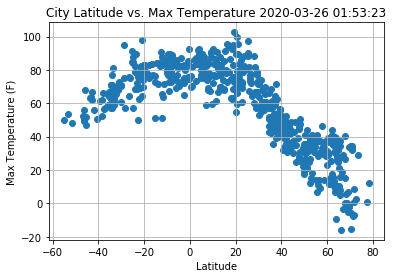

In [27]:
# create scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature"])

# add labels and title
plt.title(f"City Latitude vs. Max Temperature {regular_date[0]}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# add grid lines
plt.grid()

# show and save pic
plt.savefig("../output_data/1LatvTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

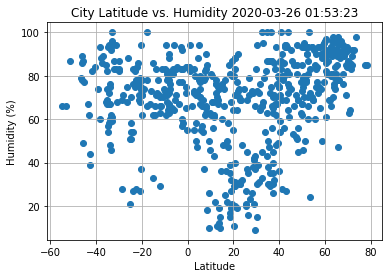

In [28]:
# create scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Humidity"])

# add labels and title
plt.title(f"City Latitude vs. Humidity {regular_date[0]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# add grid lines
plt.grid()

# show and save pic
plt.savefig("../output_data/2LatvHumid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

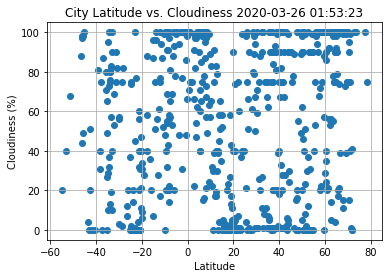

In [29]:
# create scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"])

# add labels and title
plt.title(f"City Latitude vs. Cloudiness {regular_date[0]}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# add grid lines
plt.grid()

# show and save pic
plt.savefig("../output_data/3LatvCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

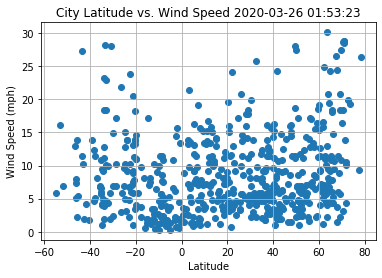

In [30]:
# create scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"])

# add labels and title
plt.title(f"City Latitude vs. Wind Speed {regular_date[0]}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# add grid lines
plt.grid()

# show and save pic
plt.savefig("../output_data/4LatvWind.png")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression